# Lego Sets Past, Present and Future

## import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
print('packages and/or modules imported')

packages and/or modules imported


## import datasets

In [2]:
sets = pd.read_csv('sets.csv', parse_dates=['year'])
themes = pd.read_csv('themes.csv')
display(sets.head(2))
print(sets.shape)
display(themes.head(2))
print(themes.shape)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965-01-01,1,43
1,0011-2,Town Mini-Figures,1979-01-01,67,12


(18021, 5)


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0


(535, 3)


## prepare and merge sets and themes

In [3]:
print(sets['theme_id'].nunique())
print(themes['id'].nunique())
print(themes['parent_id'].nunique())

509
535
59


In [4]:
display(themes.groupby('parent_id')['id'].count().sort_values(ascending=False).head())

parent_id
324.0    38
535.0    37
504.0    31
126.0    20
507.0    18
Name: id, dtype: int64

In [5]:
# themes not used for sets
mask = ~themes['id'].isin(sets['theme_id'])
display(themes[mask])

,id,name,parent_id
23,24,Airport,23.0
26,27,Race,23.0
27,28,Harbor,23.0
28,29,Train,23.0
31,32,Robot,23.0
34,35,Cargo,23.0
36,38,Model,22.0
37,39,Traffic,38.0
38,40,Creature,38.0
39,42,Airport,38.0


In [6]:
df_merged = sets.merge(themes, left_on='theme_id', right_on='id', suffixes=['_of_set', '_of_theme'])
display(df_merged.tail(2))

,set_num,name_of_set,year,theme_id,num_parts,id,name_of_theme,parent_id
18019,9754-1,Dark Side Developer Kit,2000-01-01,261,578,261,Star Wars,258.0
18020,WEETABIX1-1,Weetabix Castle,1970-01-01,414,471,414,Castle,411.0


In [7]:
print(df_merged.shape, '', df_merged.isna().sum(), sep='\n')

(18021, 8)

set_num             0
name_of_set         0
year                0
theme_id            0
num_parts           0
id                  0
name_of_theme       0
parent_id        8156
dtype: int64


In [8]:
for col in df_merged.columns:
    print(df_merged[col].nunique(), '\t', col)

18021 	 set_num
15412 	 name_of_set
71 	 year
509 	 theme_id
1289 	 num_parts
509 	 id
412 	 name_of_theme
58 	 parent_id


## group by year

In [9]:
df = df_merged.groupby('year')['name_of_set'].count().to_frame(name='count by year, all sets')
print(df.head())
df = df.asfreq('YS', fill_value=0)
display(df.head())

            count by year, all sets
year                               
1949-01-01                        5
1950-01-01                        6
1953-01-01                        4
1954-01-01                       14
1955-01-01                       28


,"count by year, all sets"
year,
1949-01-01,5
1950-01-01,6
1951-01-01,0
1952-01-01,0
1953-01-01,4


In [10]:
display(df[df['count by year, all sets'] == 0])

,"count by year, all sets"
year,
1951-01-01,0
1952-01-01,0


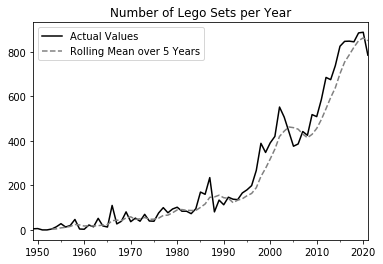

In [11]:
fig, ax = plt.subplots()
df.plot(title='Number of Lego Sets per Year', color='black', ax=ax)
df.rolling(5).mean().plot(ls='dashed', color='grey', ax=ax)
ax.legend(['Actual Values', 'Rolling Mean over 5 Years'])
plt.xlabel('')
plt.savefig('Lego Sets per Year.png');

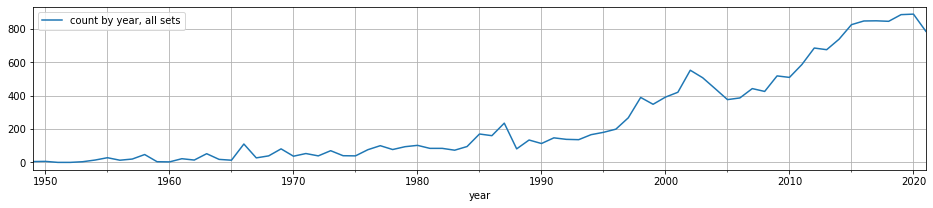

In [12]:
df.plot(figsize=(16,3))
plt.grid(which='both', )

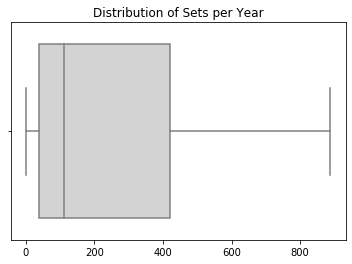

In [13]:
sns.boxplot(df, color='lightgrey')
plt.title('Distribution of Sets per Year')
plt.savefig('Distribution of Sets per Year');

## add parent themes

In [14]:
df_full = df_merged.merge(themes, how='left', left_on='parent_id', right_on='id',
                          suffixes=['_merged', '_themes'])
print(df_merged.shape, df_full.shape)
display(df_full.head(2))
display(df_full.tail(2))

(18021, 8) (18021, 11)


,set_num,name_of_set,year,theme_id,num_parts,id_merged,name_of_theme,parent_id_merged,id_themes,name,parent_id_themes
0,001-1,Gears,1965-01-01,1,43,1,Technic,NaN,NaN,NaN,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965-01-01,1,3,1,Technic,NaN,NaN,NaN,NaN


,set_num,name_of_set,year,theme_id,num_parts,id_merged,name_of_theme,parent_id_merged,id_themes,name,parent_id_themes
18019,9754-1,Dark Side Developer Kit,2000-01-01,261,578,261,Star Wars,258.0,258.0,Mindstorms,NaN
18020,WEETABIX1-1,Weetabix Castle,1970-01-01,414,471,414,Castle,411.0,411.0,Legoland,NaN


In [15]:
df_full.drop(columns=['id_merged', 'parent_id_merged', 'parent_id_themes',
                      'theme_id', 'id_themes'],
             inplace=True)
display(df_full.head(2))

,set_num,name_of_set,year,num_parts,name_of_theme,name
0,001-1,Gears,1965-01-01,43,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965-01-01,3,Technic,NaN


In [16]:
df_full['name'].fillna(value=df_full['name_of_theme'], inplace=True)
display(df_full.head(2))
display(df_full.tail(2))

,set_num,name_of_set,year,num_parts,name_of_theme,name
0,001-1,Gears,1965-01-01,43,Technic,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965-01-01,3,Technic,Technic


,set_num,name_of_set,year,num_parts,name_of_theme,name
18019,9754-1,Dark Side Developer Kit,2000-01-01,578,Star Wars,Mindstorms
18020,WEETABIX1-1,Weetabix Castle,1970-01-01,471,Castle,Legoland


In [17]:
print(df_full['name'].value_counts().head(10))

Gear                       2415
Duplo                      1218
Town                        904
Star Wars                   827
Collectible Minifigures     757
Service Packs               637
Educational and Dacta       583
City                        527
Creator                     519
Friends                     452
Name: name, dtype: int64


In [18]:
df_themes = df_full.groupby(['year', 'name'])['set_num'].count().to_frame(name='set_theme_count')
display(df_themes.head(2))
display(df_themes.tail(2))

,,set_theme_count
year,name,
1949-01-01,System,5
1950-01-01,System,6


set_theme_count
year       name                   
2021-01-01 VIDIYO               30
           Xtra                  2

### top 10 themes

name,4 Juniors,9V,Advent,Adventurers,Agents,Alpha Team,Angry Birds,Aquazone,Architecture,Atlantis,...,Unikitty!,Universal Building Set,Universe,VIDIYO,Value Packs,Vikings,Western,X-Pod,Xtra,Znap
year,,,,,,,,,,,,,,,,,,,,,
1949-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


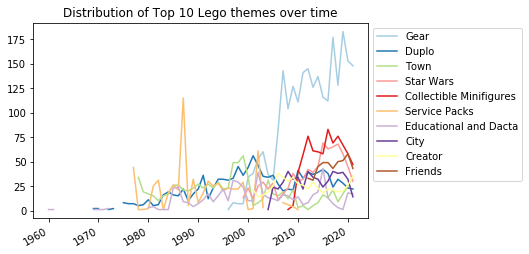

In [19]:
df_unstacked = df_themes.unstack().droplevel(0, axis=1)
display(df_unstacked.head(2))
top_list = df_full['name'].value_counts().head(10).index.to_list()
df_unstacked[top_list].plot(cmap='Paired',
                            title='Distribution of Top 10 Lego themes over time')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('')
plt.savefig('Top 10 Themes Distribution.png', bbox_inches='tight');

### number of themes with sets published per year

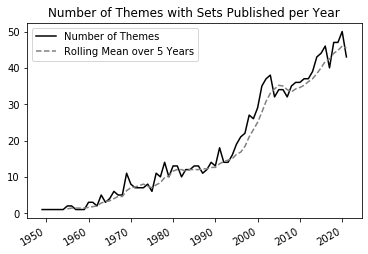

In [20]:
df_themes2 = df_full.groupby(['year', 'name']).count().reset_index()
df_themes2 = df_themes2.groupby('year')['name'].count()
df_themes2.plot(color='black', title='Number of Themes with Sets Published per Year')
df_themes2.rolling(5).mean().plot(ls='dashed', color='grey', title='Number of Themes with Sets Published per Year')
plt.xlabel('')
plt.legend(['Number of Themes', 'Rolling Mean over 5 Years'])
plt.savefig('Lego Themes per Year.png')

### sets per theme (no year)

34.5


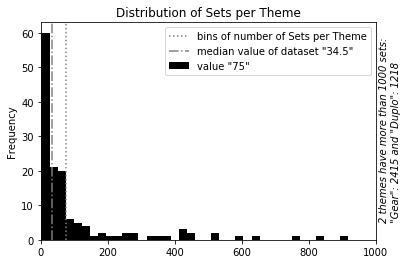

In [21]:
df_sets_per_theme = df_full.groupby('name')['set_num'].count()
print(df_sets_per_theme.median())

df_sets_per_theme.plot(kind='hist', bins=100, color='black',
                                               title='Distribution of Sets per Theme')
plt.xlim(0, 1000)
plt.axvline(75, ls='dotted', color='grey')
plt.axvline(df_sets_per_theme.median(), ls='-.', color='grey')
plt.legend(['bins of number of Sets per Theme', 'median value of dataset "34.5"', 'value "75"'])
plt.text(1075, 5, '2 themes have more than 1000 sets:\n"Gear": 2415 and "Duplo": 1218', 
         rotation=90, ha='right', va='bottom', fontdict=dict(ma='left', style='italic'))
plt.savefig('Distribution of Sets per Theme.png')

In [22]:
display(df_sets_per_theme.sort_values().tail(3))

name
Town      904
Duplo    1218
Gear     2415
Name: set_num, dtype: int64

### number of parts per set

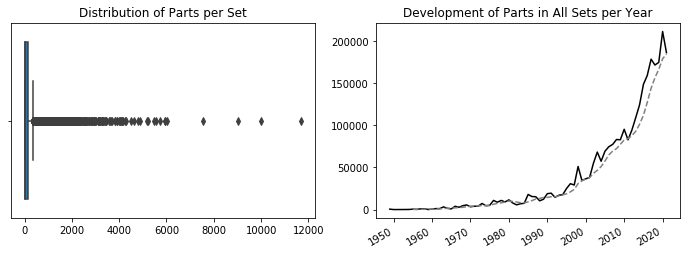

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='num_parts', data=df_full, ax=ax1)
ax1.set_title('Distribution of Parts per Set')
ax1.set_xlabel('')
df_parts_set = df_full.groupby('year')['num_parts'].sum()
df_parts_set.plot(color='black', ax=ax2)
df_parts_set.rolling(5).mean().plot(ls='dashed', color='grey', ax=ax2)
ax2.set_title('Development of Parts in All Sets per Year')
ax2.set_xlabel('')
plt.savefig('Parts per Set', bbox_inches='tight')

In [24]:
df_full.groupby('year')['num_parts'].sum()

year
1949-01-01       498
1950-01-01         6
1953-01-01        50
1954-01-01       117
1955-01-01       451
               ...  
2017-01-01    178465
2018-01-01    171513
2019-01-01    174660
2020-01-01    211277
2021-01-01    186186
Name: num_parts, Length: 71, dtype: int64

In [25]:
display(df_full[df_full['num_parts'] > 5200][['num_parts', 'set_num', 'name_of_set', 
                                              'name', 'year']].sort_values('num_parts'))

,num_parts,set_num,name_of_set,name,year
11459,5462,SWMP-1,Star Wars / M&M Mosaic - Promo Set,Star Wars,2005-01-01
3570,5549,75978-1,Diagon Alley,Harry Potter,2020-01-01
7913,5709,71741-1,NINJAGO City Gardens,Ninjago,2021-01-01
2739,5922,10189-1,Taj Mahal,Creator,2008-01-01
2758,5923,10256-1,Taj Mahal,Creator,2017-01-01
3552,6020,71043-1,Hogwarts Castle,Harry Potter,2018-01-01
2594,7541,75192-1,UCS Millennium Falcon,Star Wars,2017-01-01
2770,9036,10276-1,Colosseum,Creator,2020-01-01
14046,9987,BIGBOX-1,The Ultimate Battle for Chima,Legends of Chima,2015-01-01
14879,11695,31203-1,World Map,LEGO Art,2021-01-01


## Duplo

In [26]:
df_duplo = df_full[df_full['name'] == 'Duplo']
print(df_duplo.shape)
print(df_duplo.isna().sum())

(1218, 6)
set_num          0
name_of_set      0
year             0
num_parts        0
name_of_theme    0
name             0
dtype: int64


In [27]:
df_duplo_grouped = df_duplo.groupby('year')['set_num'].count()
df_duplo_grouped = df_duplo_grouped.asfreq('YS', fill_value=0)
print(df_duplo_grouped.head())

year
1969-01-01    2
1970-01-01    2
1971-01-01    0
1972-01-01    1
1973-01-01    2
Freq: AS-JAN, Name: set_num, dtype: int64


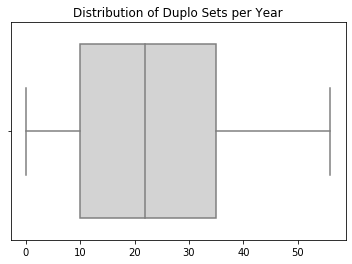

In [28]:
sns.boxplot(df_duplo_grouped, color='lightgrey')
plt.xlabel('')
plt.title('Distribution of Duplo Sets per Year')
plt.savefig('Distribution of Duplo Sets per Year.png');

## Town and City

In [29]:
df_towncity = df_full[df_full['name'].isin(['Town', 'City'])]
print(df_towncity.shape)
print(df_towncity.isna().sum())

(1431, 6)
set_num          0
name_of_set      0
year             0
num_parts        0
name_of_theme    0
name             0
dtype: int64


In [30]:
df_towncity

,set_num,name_of_set,year,num_parts,name_of_theme,name
85,0011-2,Town Mini-Figures,1979-01-01,12,Classic Town,Town
86,00-6,Special Offer,1985-01-01,0,Classic Town,Town
87,105-1,Canada Post Truck,1984-01-01,65,Classic Town,Town
88,106-1,UNICEF Van,1985-01-01,59,Classic Town,Town
89,107-2,Canada Post Mail Truck,1985-01-01,138,Classic Town,Town
...,...,...,...,...,...,...
16542,6577-1,Snow Scooter,2000-01-01,21,Arctic,Town
16543,6578-1,Polar Explorer,2000-01-01,22,Arctic,Town
16544,6579-1,Ice Surfer,2000-01-01,43,Arctic,Town
16545,6586-1,Polar Scout,2000-01-01,56,Arctic,Town


In [31]:
print(df_towncity.groupby(['year', 'name'])['set_num'].count())

year        name
1969-01-01  Town     1
1978-01-01  Town    34
1979-01-01  Town    19
1980-01-01  Town    17
1981-01-01  Town    15
                    ..
2019-01-01  Town    17
2020-01-01  City    32
            Town    25
2021-01-01  City    14
            Town    35
Name: set_num, Length: 63, dtype: int64


In [32]:
display(df_towncity[df_towncity['name'] == 'Town'].sort_values('year').head())
display(df_towncity[df_towncity['name'] == 'City'].sort_values('year').head())
display(df_towncity.sort_values(['year', 'num_parts']).tail(10))

,set_num,name_of_set,year,num_parts,name_of_theme,name
3814,842-2,Town Plan,1969-01-01,797,Town Plan,Town
327,643-1,Flatbed Truck,1978-01-01,39,Classic Town,Town
228,605-1,Street Sweeper,1978-01-01,19,Classic Town,Town
227,604-1,Shell Service Car,1978-01-01,22,Classic Town,Town
226,603-1,Motorbike,1978-01-01,26,Classic Town,Town


,set_num,name_of_set,year,num_parts,name_of_theme,name
3636,10159-1,City Airport,2004-01-01,914,Airport,City
13432,7245-1,"Prisoner Transport, Black Logo",2005-01-01,100,Police,City
13430,7237-1,Police Station [Lighted Figure],2005-01-01,602,Police,City
13428,7236-1,"Police Car, Black Logo",2005-01-01,60,Police,City
13426,7235-1,"Police Motorcycle, Black Logo",2005-01-01,29,Police,City


,set_num,name_of_set,year,num_parts,name_of_theme,name
13411,60277-1,Police Patrol Boat,2021-01-01,276,Police,City
13552,60289-1,Airshow Jet Transporter,2021-01-01,281,City,Town
13570,60308-1,Seaside Police and Fire Mission,2021-01-01,297,City,Town
13567,60305-1,Car Transporter,2021-01-01,342,City,Town
10509,60282-1,Fire Command Unit,2021-01-01,380,Fire,City
13554,60291-1,Family House,2021-01-01,388,City,Town
13569,60307-1,Wildlife Rescue Camp,2021-01-01,503,City,Town
13565,60302-1,Wildlife Rescue Operation,2021-01-01,525,City,Town
13568,60306-1,Shopping Street,2021-01-01,533,City,Town
13555,60292-1,Town Center,2021-01-01,791,City,Town


In [33]:
df_towncity_grouped = df_towncity.groupby('year')['set_num'].count()
df_towncity_grouped = df_towncity_grouped['1978':]
df_towncity_grouped = df_towncity_grouped.asfreq('YS')
print(df_towncity_grouped.head())

year
1978-01-01    34
1979-01-01    19
1980-01-01    17
1981-01-01    15
1982-01-01    10
Freq: AS-JAN, Name: set_num, dtype: int64


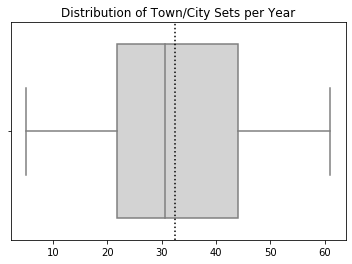

In [34]:
sns.boxplot(df_towncity_grouped, color='lightgrey')
plt.axvline(df_towncity_grouped.mean(), color='black', ls='dotted')
plt.xlabel('')
plt.title('Distribution of Town/City Sets per Year')
plt.savefig('Distribution of Town_City Sets per Year.png');

## Trend, Seasonality and Noise

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

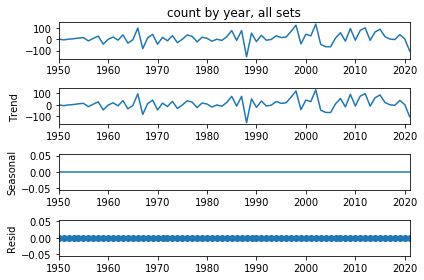

In [36]:
seasonal_decompose(df['count by year, all sets'].diff().dropna()).plot()
plt.savefig('seasonal_decompose_years.png', bbox_inches='tight');

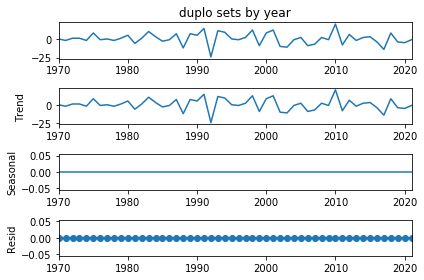

In [37]:
seasonal_decompose(df_duplo_grouped.to_frame(name='duplo sets by year')['duplo sets by year'].diff().dropna()).plot()
plt.savefig('seasonal_decompose_duplo.png', bbox_inches='tight');

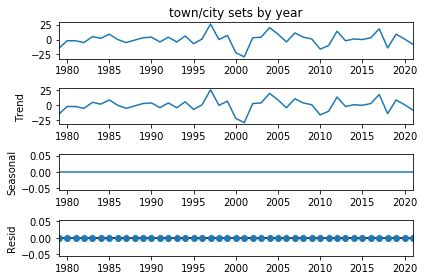

In [38]:
seasonal_decompose(df_towncity_grouped.to_frame(name='town/city sets by year')['town/city sets by year'].diff().dropna()).plot()
plt.savefig('seasonal_decompose_towncity.png', bbox_inches='tight');

## Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
year_adf = adfuller(df)
print(year_adf[0], year_adf[1], year_adf[4], sep='\n')
print('-'*80)

duplo_adf = adfuller(df_duplo_grouped)
print(duplo_adf[0], duplo_adf[1], duplo_adf[4], sep='\n')
print('-'*80)

towncity_adf = adfuller(df_towncity_grouped)
print(towncity_adf[0], towncity_adf[1], towncity_adf[4], sep='\n')

0.7483810484437359
0.9907555543990169
{'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}
--------------------------------------------------------------------------------
-2.2659029306957255
0.18320081547232347
{'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}
--------------------------------------------------------------------------------
-0.4189079943125299
0.9068936312573244
{'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


In [41]:
year_adf = adfuller(df.diff().dropna())
print(year_adf[0], year_adf[1], year_adf[4], sep='\n')
print('-'*80)

duplo_adf = adfuller(df_duplo_grouped.diff().dropna())
print(duplo_adf[0], duplo_adf[1], duplo_adf[4], sep='\n')
print('-'*80)

towncity_adf = adfuller(df_towncity_grouped.diff().dropna())
print(towncity_adf[0], towncity_adf[1], towncity_adf[4], sep='\n')

-9.601989949510328
1.9097051767289004e-16
{'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}
--------------------------------------------------------------------------------
-7.020983054498641
6.544489441306652e-10
{'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
--------------------------------------------------------------------------------
-5.544791586221835
1.6702962111142508e-06
{'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


In [42]:
year_adf = adfuller(df.diff().diff().dropna())
print(year_adf[0], year_adf[1], year_adf[4], sep='\n')
print('-'*80)

duplo_adf = adfuller(df_duplo_grouped.diff().diff().dropna())
print(duplo_adf[0], duplo_adf[1], duplo_adf[4], sep='\n')
print('-'*80)

towncity_adf = adfuller(df_towncity_grouped.diff().diff().dropna())
print(towncity_adf[0], towncity_adf[1], towncity_adf[4], sep='\n')

-7.556139082464341
3.0959554886111787e-11
{'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}
--------------------------------------------------------------------------------
-10.001868959896237
1.8749975542258738e-17
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
--------------------------------------------------------------------------------
-3.9116374715877176
0.0019508515694299984
{'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}


## (Partial) Autocorrelation

In [43]:
from statsmodels.graphics import tsaplots

### years

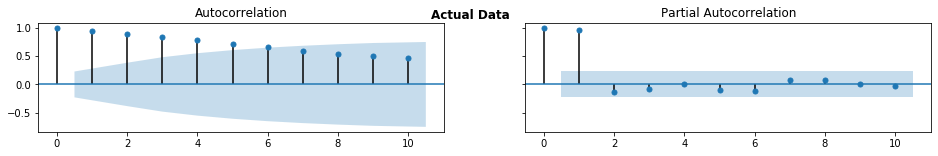

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df, lags=10, ax=ax1)
tsaplots.plot_pacf(df, lags=10, ax=ax2)
plt.suptitle('Actual Data', weight='bold')
plt.savefig('autocorr year.png', bbox_inches='tight');

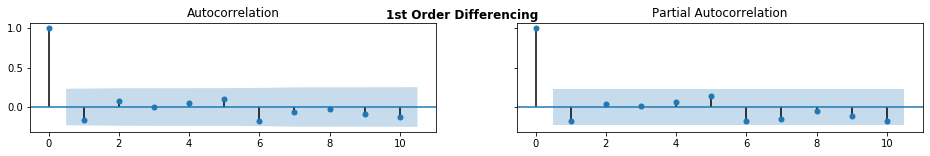

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df.diff().dropna(), lags=10, ax=ax1)
tsaplots.plot_pacf(df.diff().dropna(), lags=10, ax=ax2)
plt.suptitle('1st Order Differencing', weight='bold')
plt.savefig('autocorr year 1 diff.png', bbox_inches='tight');

### duplo

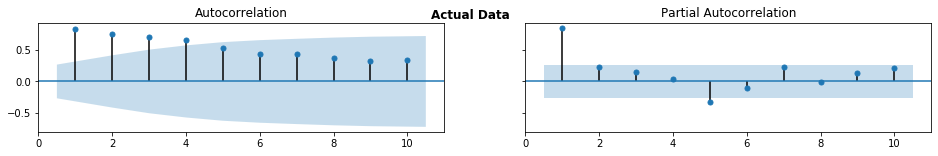

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df_duplo_grouped, lags=10, zero=False, ax=ax1)
tsaplots.plot_pacf(df_duplo_grouped, lags=10, zero=False, ax=ax2)
plt.suptitle('Actual Data', weight='bold')
plt.savefig('autocorr duplo.png', bbox_inches='tight');

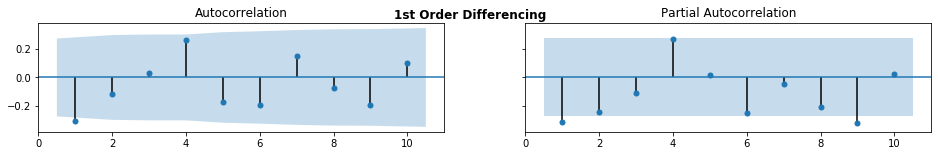

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df_duplo_grouped.diff().dropna(), lags=10, zero=False, ax=ax1)
tsaplots.plot_pacf(df_duplo_grouped.diff().dropna(), lags=10, zero=False, ax=ax2)
plt.suptitle('1st Order Differencing', weight='bold')
plt.savefig('autocorr duplo 1 diff.png', bbox_inches='tight');

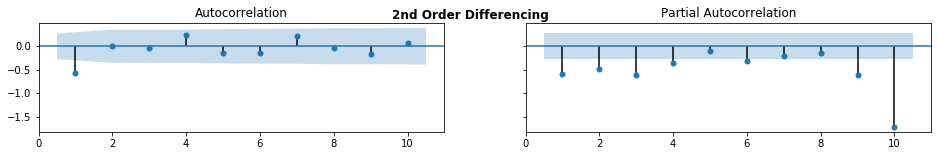

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df_duplo_grouped.diff().diff().dropna(), lags=10, zero=False, ax=ax1)
tsaplots.plot_pacf(df_duplo_grouped.diff().diff().dropna(), lags=10, zero=False, ax=ax2)
plt.suptitle('2nd Order Differencing', weight='bold')
plt.savefig('autocorr duplo 2 diff.png', bbox_inches='tight');

### town/city

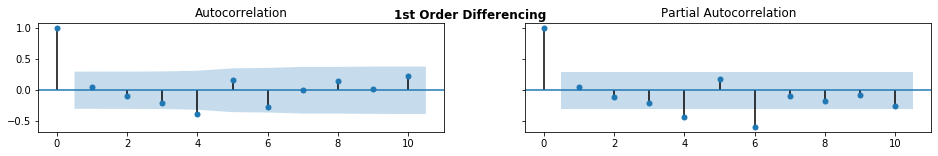

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df_towncity_grouped.diff().dropna(), lags=10, ax=ax1)
tsaplots.plot_pacf(df_towncity_grouped.diff().dropna(), lags=10, ax=ax2)
plt.suptitle('1st Order Differencing', weight='bold')
plt.savefig('autocorr towncity 1 diff.png', bbox_inches='tight');

## Find good models

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### years

In [51]:
aic_bic_results = []

for p in range(0,4):
    for q in range(0,4):
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 0,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
display(df_aic_bic.sort_values('aic').head(3))
display(df_aic_bic.sort_values('bic').head(3))

ARIMA(0, 0,0) done - ARIMA(0, 0,1) done - ARIMA(0, 0,2) done - ARIMA(0, 0,3) done - ARIMA(1, 0,0) done - ARIMA(1, 0,1) done - ARIMA(1, 0,2) done - ARIMA(1, 0,3) done - ARIMA(2, 0,0) done - ARIMA(2, 0,1) done - ARIMA(2, 0,2) done - ARIMA(2, 0,3) done - ARIMA(3, 0,0) done - ARIMA(3, 0,1) done - ARIMA(3, 0,2) done - ARIMA(3, 0,3) done - 

,model,aic,bic
4,"ARIMA(1, 0,0)",785.977823,790.558742
8,"ARIMA(2, 0,0)",787.182090,794.053468
5,"ARIMA(1, 0,1)",787.352267,794.223646


,model,aic,bic
4,"ARIMA(1, 0,0)",785.977823,790.558742
8,"ARIMA(2, 0,0)",787.182090,794.053468
5,"ARIMA(1, 0,1)",787.352267,794.223646


In [52]:
aic_bic_results = []

for p in range(0,5):
    for q in range(0,5):
        model = SARIMAX(df, order=(p,1,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 1,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
display(df_aic_bic.sort_values('aic').head(3))
display(df_aic_bic.sort_values('bic').head(3))

ARIMA(0, 1,0) done - ARIMA(0, 1,1) done - ARIMA(0, 1,2) done - ARIMA(0, 1,3) done - ARIMA(0, 1,4) done - ARIMA(1, 1,0) done - ARIMA(1, 1,1) done - ARIMA(1, 1,2) done - ARIMA(1, 1,3) done - ARIMA(1, 1,4) done - ARIMA(2, 1,0) done - ARIMA(2, 1,1) done - ARIMA(2, 1,2) done - ARIMA(2, 1,3) done - ARIMA(2, 1,4) done - ARIMA(3, 1,0) done - ARIMA(3, 1,1) done - ARIMA(3, 1,2) done - ARIMA(3, 1,3) done - ARIMA(3, 1,4) done - ARIMA(4, 1,0) done - ARIMA(4, 1,1) done - ARIMA(4, 1,2) done - ARIMA(4, 1,3) done - ARIMA(4, 1,4) done - 

,model,aic,bic
0,"ARIMA(0, 1,0)",768.741447,771.018113
12,"ARIMA(2, 1,2)",769.348619,780.731950
5,"ARIMA(1, 1,0)",769.866340,774.419672


,model,aic,bic
0,"ARIMA(0, 1,0)",768.741447,771.018113
5,"ARIMA(1, 1,0)",769.866340,774.419672
1,"ARIMA(0, 1,1)",770.046317,774.599649


In [53]:
aic_bic_results = []

for p in range(0,5):
    for q in range(0,5):
        model = SARIMAX(df, order=(p,2,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 2,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
display(df_aic_bic.sort_values('aic').head(3))
display(df_aic_bic.sort_values('bic').head(3))

ARIMA(0, 2,0) done - ARIMA(0, 2,1) done - ARIMA(0, 2,2) done - ARIMA(0, 2,3) done - ARIMA(0, 2,4) done - ARIMA(1, 2,0) done - ARIMA(1, 2,1) done - ARIMA(1, 2,2) done - ARIMA(1, 2,3) done - ARIMA(1, 2,4) done - ARIMA(2, 2,0) done - ARIMA(2, 2,1) done - ARIMA(2, 2,2) done - ARIMA(2, 2,3) done - ARIMA(2, 2,4) done - ARIMA(3, 2,0) done - ARIMA(3, 2,1) done - ARIMA(3, 2,2) done - ARIMA(3, 2,3) done - ARIMA(3, 2,4) done - ARIMA(4, 2,0) done - ARIMA(4, 2,1) done - ARIMA(4, 2,2) done - ARIMA(4, 2,3) done - ARIMA(4, 2,4) done - 

,model,aic,bic
6,"ARIMA(1, 2,1)",761.451595,768.239634
2,"ARIMA(0, 2,2)",761.665641,768.453680
1,"ARIMA(0, 2,1)",761.829444,766.354804


,model,aic,bic
1,"ARIMA(0, 2,1)",761.829444,766.354804
6,"ARIMA(1, 2,1)",761.451595,768.239634
2,"ARIMA(0, 2,2)",761.665641,768.453680


### duplo

In [68]:
aic_bic_results = []

for p in range(0,11):
    for q in range(0,11):
        model = SARIMAX(df_duplo_grouped, order=(p,0,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 0,' + str(q) + ')'
        aic_bic_results.append((model_name, p, q, results.aic, results.bic))
        #print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'p', 'q', 'aic', 'bic'])
print(df_aic_bic.sort_values('aic').head(3))
print(df_aic_bic.sort_values('bic').head(3))

            model  p  q         aic         bic
12  ARIMA(1, 0,1)  1  1  368.272305  374.183181
35  ARIMA(3, 0,2)  3  2  368.349819  380.171571
46  ARIMA(4, 0,2)  4  2  368.404611  382.196655
            model  p  q         aic         bic
12  ARIMA(1, 0,1)  1  1  368.272305  374.183181
22  ARIMA(2, 0,0)  2  0  369.985291  375.896166
11  ARIMA(1, 0,0)  1  0  372.381445  376.322029


In [55]:
aic_bic_results = []

for p in range(0,11):
    for q in range(0,11):
        model = SARIMAX(df_duplo_grouped, order=(p,1,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 1,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        #print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
print(df_aic_bic.sort_values('aic').head(3))
print(df_aic_bic.sort_values('bic').head(3))

            model         aic         bic
1   ARIMA(0, 1,1)  357.949738  361.852225
24  ARIMA(2, 1,2)  358.273988  368.030207
5   ARIMA(0, 1,5)  358.679146  370.386608
            model         aic         bic
1   ARIMA(0, 1,1)  357.949738  361.852225
11  ARIMA(1, 1,0)  359.893813  363.796301
0   ARIMA(0, 1,0)  362.741510  364.692754


In [56]:
aic_bic_results = []

for p in range(0,11):
    for q in range(0,11):
        model = SARIMAX(df_duplo_grouped, order=(p,2,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 2,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        #print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
print(df_aic_bic.sort_values('aic').head(3))
print(df_aic_bic.sort_values('bic').head(3))

            model         aic         bic
2   ARIMA(0, 2,2)  358.541863  364.337340
36  ARIMA(3, 2,3)  358.633245  372.156025
25  ARIMA(2, 2,3)  358.696356  370.287310
            model         aic         bic
2   ARIMA(0, 2,2)  358.541863  364.337340
12  ARIMA(1, 2,1)  360.257346  366.052823
1   ARIMA(0, 2,1)  362.622892  366.486543


### town/city

In [57]:
aic_bic_results = []

for p in range(0,5):
    for q in range(0,5):
        model = SARIMAX(df_towncity_grouped, order=(p,0,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 0,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
display(df_aic_bic.sort_values('aic').head(3))
display(df_aic_bic.sort_values('bic').head(3))

ARIMA(0, 0,0) done - ARIMA(0, 0,1) done - ARIMA(0, 0,2) done - ARIMA(0, 0,3) done - ARIMA(0, 0,4) done - ARIMA(1, 0,0) done - ARIMA(1, 0,1) done - ARIMA(1, 0,2) done - ARIMA(1, 0,3) done - ARIMA(1, 0,4) done - ARIMA(2, 0,0) done - ARIMA(2, 0,1) done - ARIMA(2, 0,2) done - ARIMA(2, 0,3) done - ARIMA(2, 0,4) done - ARIMA(3, 0,0) done - ARIMA(3, 0,1) done - ARIMA(3, 0,2) done - ARIMA(3, 0,3) done - ARIMA(3, 0,4) done - ARIMA(4, 0,0) done - ARIMA(4, 0,1) done - ARIMA(4, 0,2) done - ARIMA(4, 0,3) done - ARIMA(4, 0,4) done - 

,model,aic,bic
14,"ARIMA(2, 0,4)",325.334154,337.823482
19,"ARIMA(3, 0,4)",325.638898,339.912415
24,"ARIMA(4, 0,4)",327.518187,343.575894


,model,aic,bic
14,"ARIMA(2, 0,4)",325.334154,337.823482
5,"ARIMA(1, 0,0)",335.416932,338.985312
9,"ARIMA(1, 0,4)",328.944821,339.649959


In [58]:
aic_bic_results = []

for p in range(0,5):
    for q in range(0,5):
        model = SARIMAX(df_towncity_grouped, order=(p,1,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 1,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
display(df_aic_bic.sort_values('aic').head(3))
display(df_aic_bic.sort_values('bic').head(3))

ARIMA(0, 1,0) done - ARIMA(0, 1,1) done - ARIMA(0, 1,2) done - ARIMA(0, 1,3) done - ARIMA(0, 1,4) done - ARIMA(1, 1,0) done - ARIMA(1, 1,1) done - ARIMA(1, 1,2) done - ARIMA(1, 1,3) done - ARIMA(1, 1,4) done - ARIMA(2, 1,0) done - ARIMA(2, 1,1) done - ARIMA(2, 1,2) done - ARIMA(2, 1,3) done - ARIMA(2, 1,4) done - ARIMA(3, 1,0) done - ARIMA(3, 1,1) done - ARIMA(3, 1,2) done - ARIMA(3, 1,3) done - ARIMA(3, 1,4) done - ARIMA(4, 1,0) done - ARIMA(4, 1,1) done - ARIMA(4, 1,2) done - ARIMA(4, 1,3) done - ARIMA(4, 1,4) done - 

,model,aic,bic
9,"ARIMA(1, 1,4)",313.425671,323.992872
14,"ARIMA(2, 1,4)",313.666768,325.995168
21,"ARIMA(4, 1,1)",314.157038,324.724239


,model,aic,bic
9,"ARIMA(1, 1,4)",313.425671,323.992872
21,"ARIMA(4, 1,1)",314.157038,324.724239
4,"ARIMA(0, 1,4)",316.795599,325.601599


In [59]:
aic_bic_results = []

for p in range(0,5):
    for q in range(0,5):
        model = SARIMAX(df_towncity_grouped, order=(p,2,q))
        results = model.fit()
        model_name='ARIMA(' + str(p) + ', 2,' + str(q) + ')'
        aic_bic_results.append((model_name, results.aic, results.bic))
        print(model_name, 'done', end=' - ')
        
df_aic_bic = pd.DataFrame(aic_bic_results, columns=['model', 'aic', 'bic'])
display(df_aic_bic.sort_values('aic').head(3))
display(df_aic_bic.sort_values('bic').head(3))

ARIMA(0, 2,0) done - ARIMA(0, 2,1) done - ARIMA(0, 2,2) done - ARIMA(0, 2,3) done - ARIMA(0, 2,4) done - ARIMA(1, 2,0) done - ARIMA(1, 2,1) done - ARIMA(1, 2,2) done - ARIMA(1, 2,3) done - ARIMA(1, 2,4) done - ARIMA(2, 2,0) done - ARIMA(2, 2,1) done - ARIMA(2, 2,2) done - ARIMA(2, 2,3) done - ARIMA(2, 2,4) done - ARIMA(3, 2,0) done - ARIMA(3, 2,1) done - ARIMA(3, 2,2) done - ARIMA(3, 2,3) done - ARIMA(3, 2,4) done - ARIMA(4, 2,0) done - ARIMA(4, 2,1) done - ARIMA(4, 2,2) done - ARIMA(4, 2,3) done - ARIMA(4, 2,4) done - 

,model,aic,bic
22,"ARIMA(4, 2,2)",313.926397,326.090085
23,"ARIMA(4, 2,3)",315.091921,328.993278
24,"ARIMA(4, 2,4)",315.346310,330.985336


,model,aic,bic
22,"ARIMA(4, 2,2)",313.926397,326.090085
3,"ARIMA(0, 2,3)",319.675345,326.626024
1,"ARIMA(0, 2,1)",323.169612,326.644952


## Modelling
### ARIMA(1, 0, 1)

                               SARIMAX Results                                
Dep. Variable:                set_num   No. Observations:                   53
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -181.136
Date:                Mon, 23 Aug 2021   AIC                            368.272
Time:                        14:14:32   BIC                            374.183
Sample:                    01-01-1969   HQIC                           370.545
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9798      0.024     40.922      0.000       0.933       1.027
ma.L1         -0.3746      0.144     -2.594      0.009      -0.658      -0.092
sigma2        51.9953      9.177      5.666      0.0

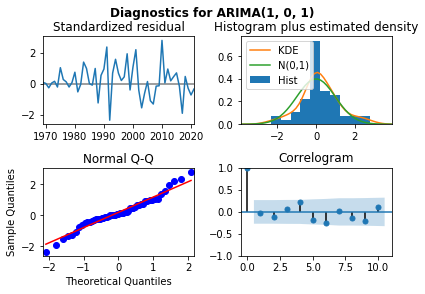

In [175]:
model101 = SARIMAX(df_duplo_grouped, order=(1,0,1))
results101 = model101.fit()
print(results101.summary())
results101.plot_diagnostics()
plt.tight_layout()
plt.suptitle('Diagnostics for ARIMA(1, 0, 1)', y=1.01, weight='bold')
plt.savefig('Diagnostics ARIMA 101.png', bbox_inches='tight');

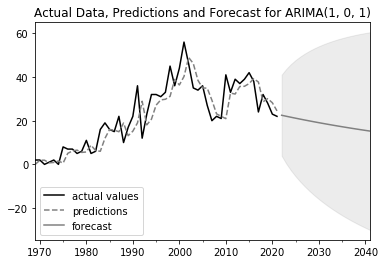

In [176]:
df_duplo_grouped.plot(color='black', label='actual values')
results101.get_prediction().predicted_mean.plot(color='grey', ls='dashed', label='predictions')
results101.get_forecast(steps=20).predicted_mean.plot(color='grey', label='forecast')
confidence_int101 = results101.get_forecast(steps=20).conf_int(alpha = 0.01)
plt.fill_between(confidence_int101.index,confidence_int101['lower set_num'],confidence_int101['upper set_num'],
                 color='grey', alpha = 0.15)
plt.xlabel('')
plt.legend(loc='lower left')
plt.title('Actual Data, Predictions and Forecast for ARIMA(1, 0, 1)')
plt.savefig('Actual Predict Forecast 101.png', bbox_inches='tight');

### ARIMA(0, 1, 1)

                               SARIMAX Results                                
Dep. Variable:                set_num   No. Observations:                   53
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -176.738
Date:                Mon, 23 Aug 2021   AIC                            359.477
Time:                        14:14:33   BIC                            365.331
Sample:                    01-01-1969   HQIC                           361.721
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4268      0.616      0.693      0.488      -0.780       1.634
ma.L1         -0.4003      0.127     -3.148      0.002      -0.649      -0.151
sigma2        52.2685      9.545      5.476      0.0

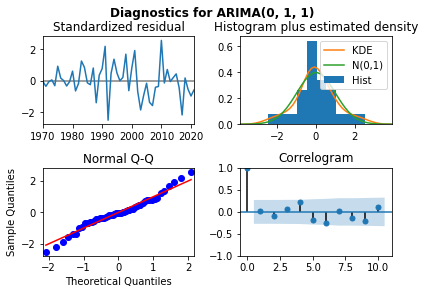

In [177]:
model011 = SARIMAX(df_duplo_grouped, order=(0,1,1), trend='c')
results011 = model011.fit()
print(results011.summary())
results011.plot_diagnostics()
plt.tight_layout()
plt.suptitle('Diagnostics for ARIMA(0, 1, 1)', y=1.01, weight='bold')
plt.savefig('Diagnostics ARIMA 011.png', bbox_inches='tight');

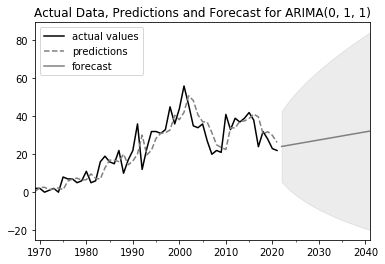

In [178]:
df_duplo_grouped.plot(color='black', label='actual values')
results011.get_prediction().predicted_mean.plot(color='grey', ls='dashed', label='predictions')
results011.get_forecast(steps=20).predicted_mean.plot(color='grey', label='forecast')
confidence_int011 = results011.get_forecast(steps=20).conf_int(alpha = 0.01)
plt.fill_between(confidence_int011.index,confidence_int011['lower set_num'],confidence_int011['upper set_num'],
                 color='grey', alpha = 0.15)
plt.xlabel('')
plt.legend(loc='upper left')
plt.title('Actual Data, Predictions and Forecast for ARIMA(0, 1, 1)')
plt.savefig('Actual Predict Forecast 011.png', bbox_inches='tight');

### ARIMA(0, 2, 2)

                               SARIMAX Results                                
Dep. Variable:                set_num   No. Observations:                   53
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -175.565
Date:                Mon, 23 Aug 2021   AIC                            359.131
Time:                        14:14:35   BIC                            366.858
Sample:                    01-01-1969   HQIC                           362.084
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0508      0.047     -1.085      0.278      -0.143       0.041
ma.L1         -1.4124      5.440     -0.260      0.795     -12.074       9.249
ma.L2          0.4129      2.206      0.187      0.8

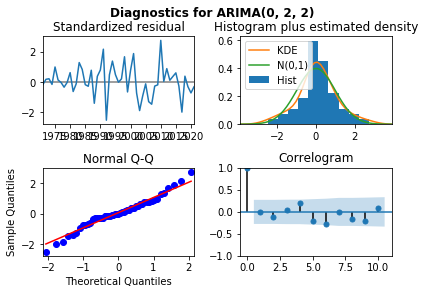

In [179]:
model022 = SARIMAX(df_duplo_grouped, order=(0,2,2), trend='c')
results022 = model022.fit()
print(results022.summary())
results022.plot_diagnostics()
plt.tight_layout()
plt.suptitle('Diagnostics for ARIMA(0, 2, 2)', y=1.01, weight='bold')
plt.savefig('Diagnostics ARIMA 022.png', bbox_inches='tight');

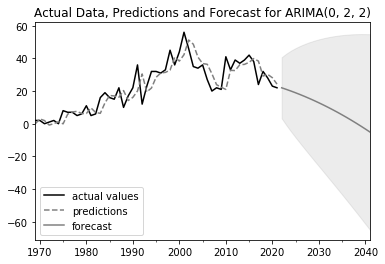

In [180]:
df_duplo_grouped.plot(color='black', label='actual values')
results022.get_prediction().predicted_mean.plot(color='grey', ls='dashed', label='predictions')
results022.get_forecast(steps=20).predicted_mean.plot(color='grey', label='forecast')
confidence_int022 = results022.get_forecast(steps=20).conf_int(alpha = 0.01)
plt.fill_between(confidence_int022.index,confidence_int022['lower set_num'],confidence_int022['upper set_num'],
                 color='grey', alpha = 0.15)
plt.xlabel('')
plt.legend(loc='lower left')
plt.title('Actual Data, Predictions and Forecast for ARIMA(0, 2, 2)')
plt.savefig('Actual Predict Forecast 022.png', bbox_inches='tight');

### resids

In [181]:
print(results101.resid.mean())
print(results101.resid.std())
print('-'*20)
print(results011.resid.mean())
print(results011.resid.std())
print('-'*20)
print(results022.resid.mean())
print(results022.resid.std())
# results101.resid.plot(kind='line', alpha=0.25)
# results011.resid.plot(kind='line', alpha=0.25)
# results022.resid.plot(kind='line', alpha=0.25);

1.4019633978152939
7.145795477059154
--------------------
0.015267265604687157
7.233207178785556
--------------------
0.5457844560562354
7.272862621443911


### predictions only

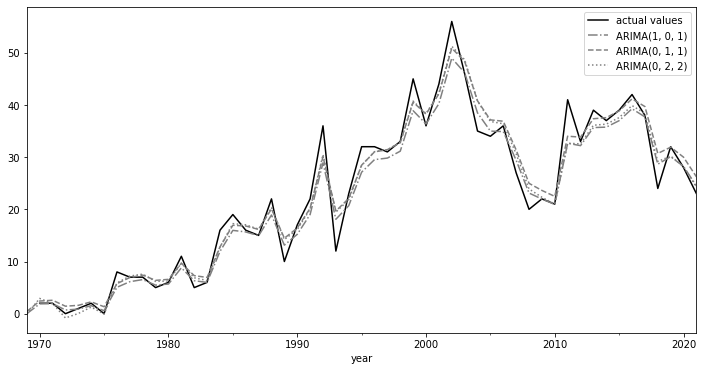

In [182]:
df_duplo_grouped.shift().plot(color='black', figsize=(12,6), label='actual values')
results101.get_prediction().predicted_mean.plot(color='grey', ls='dashdot', label='ARIMA(1, 0, 1)')
results011.get_prediction().predicted_mean.plot(color='grey', ls='dashed', label='ARIMA(0, 1, 1)')
results022.get_prediction().predicted_mean.plot(color='grey', ls='dotted', label='ARIMA(0, 2, 2)')
plt.legend()
plt.savefig('actual vs pred.png', bbox_inches='tight');

### forecasts only

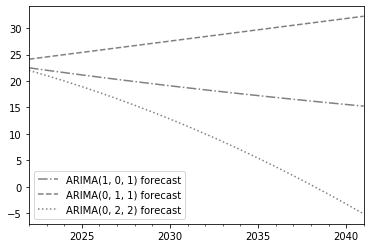

In [183]:
results101.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dashdot', label='ARIMA(1, 0, 1) forecast')
results011.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dashed', label='ARIMA(0, 1, 1) forecast')
results022.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dotted', label='ARIMA(0, 2, 2) forecast')
plt.legend()
plt.savefig('all forecasts.png', bbox_inches='tight');

### combined

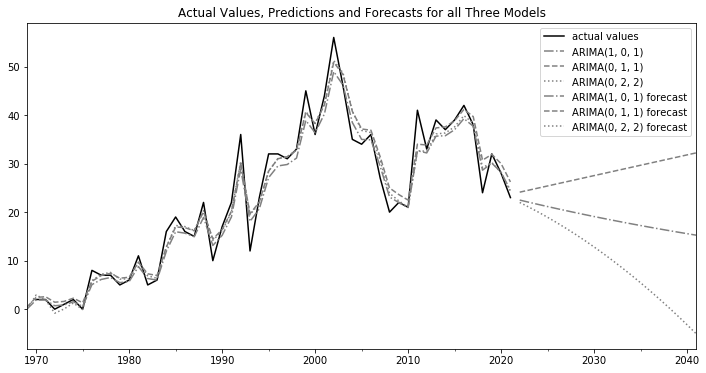

In [184]:
df_duplo_grouped.shift().plot(color='black', figsize=(12,6), label='actual values')
results101.get_prediction().predicted_mean.plot(color='grey', ls='dashdot', label='ARIMA(1, 0, 1)')
results011.get_prediction().predicted_mean.plot(color='grey', ls='dashed', label='ARIMA(0, 1, 1)')
results022.get_prediction().predicted_mean.plot(color='grey', ls='dotted', label='ARIMA(0, 2, 2)')
results101.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dashdot', label='ARIMA(1, 0, 1) forecast')
results011.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dashed', label='ARIMA(0, 1, 1) forecast')
results022.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dotted', label='ARIMA(0, 2, 2) forecast')
plt.legend()
plt.xlabel('')
plt.title('Actual Values, Predictions and Forecasts for all Three Models')
plt.savefig('all models 2021.png', bbox_inches='tight');

### combined to 2020 only (last full year)

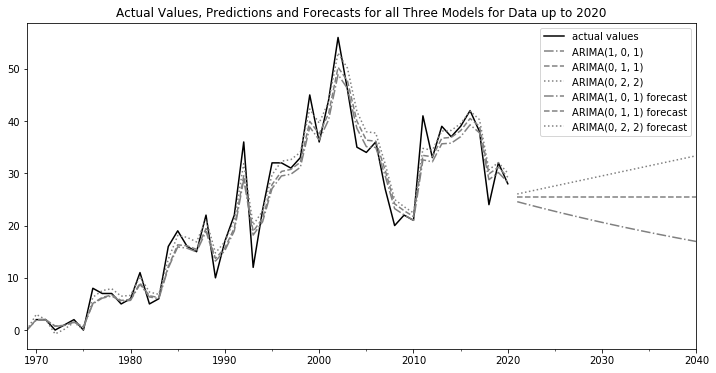

In [185]:
model101 = SARIMAX(df_duplo_grouped[:'2020'], order=(1,0,1))
results101 = model101.fit()
model011 = SARIMAX(df_duplo_grouped[:'2020'], order=(0,1,1))
results011 = model011.fit()
model022 = SARIMAX(df_duplo_grouped[:'2020'], order=(0,2,2))
results022 = model022.fit()

df_duplo_grouped[:'2020'].shift().plot(color='black', figsize=(12,6), label='actual values')
results101.get_prediction().predicted_mean.plot(color='grey', ls='dashdot', label='ARIMA(1, 0, 1)')
results011.get_prediction().predicted_mean.plot(color='grey', ls='dashed', label='ARIMA(0, 1, 1)')
results022.get_prediction().predicted_mean.plot(color='grey', ls='dotted', label='ARIMA(0, 2, 2)')
results101.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dashdot', label='ARIMA(1, 0, 1) forecast')
results011.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dashed', label='ARIMA(0, 1, 1) forecast')
results022.get_forecast(steps=20).predicted_mean.plot(color='grey', ls='dotted', label='ARIMA(0, 2, 2) forecast')
plt.legend()
plt.xlabel('')
plt.title('Actual Values, Predictions and Forecasts for all Three Models for Data up to 2020')
plt.savefig('all models 2020.png', bbox_inches='tight');

In [186]:
print(results101.resid.mean())
print(results101.resid.std())
print('-'*20)
print(results011.resid.mean())
print(results011.resid.std())
print('-'*20)
print(results022.resid.mean())
print(results022.resid.std())

1.4622873433605268
7.195282402225692
--------------------
0.7816235365245265
7.281180918903081
--------------------
-0.42037170666570967
7.439020672338209
